# MSDS 670 Final Project
Wiley Winters</br>
MSDS 670 Data Visualization</br>
2024-MAR-10</br>

---------------------------------------------------------------------
Import required packages and libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import numpy as np

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set seaborn autoconfig to True
rcParams.update({'figure.autolayout': True})

In [2]:
causes_df = pd.read_csv('../data/NCHS_-_Leading_Causes_of_Death__United_States.csv')
causes_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


The `usaTotalPop` will be used later on to calculate the *crude death rate* per 100,000 people

In [3]:
total_df = pd.read_csv('../data/usaTotalPop.csv')
total_df.head()

,year,population
0,1999,279040000
1,2000,282162411
2,2001,284968955
3,2002,287625193
4,2003,290107933


Column names with spaces are a little hard to work with.  I will rename with spaces replaced by underscores `_`

In [4]:
causes_df.rename({'Year':'year', '113 Cause Name': '113_cause_name',
                 'Cause Name':'cause_name', 'State': 'state', 'Deaths':'deaths',
                 'Age-adjusted Death Rate':'age_adjusted'}, axis=1, inplace=True)
causes_df.columns

Index(['year', '113_cause_name', 'cause_name', 'state', 'deaths',
       'age_adjusted'],
      dtype='object')

Ensure causes_df is sane enough to use

In [5]:
print(causes_df.info())
print('\\nNaN Values:\\n', causes_df.isna().sum())
print('\\nDuplicates: ', causes_df.duplicated().sum())
print('\\nSize: ', causes_df.size)
print('\\nDistribution:\\n', causes_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            10868 non-null  int64  
 1   113_cause_name  10868 non-null  object 
 2   cause_name      10868 non-null  object 
 3   state           10868 non-null  object 
 4   deaths          10868 non-null  int64  
 5   age_adjusted    10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB
None
\nNaN Values:\n year              0
113_cause_name    0
cause_name        0
state             0
deaths            0
age_adjusted      0
dtype: int64
\nDuplicates:  0
\nSize:  65208
\nDistribution:\n                 count          mean            std     min     25%     50%  \
year          10868.0   2008.000000       5.477478  1999.0  2003.0  2008.0   
deaths        10868.0  15459.910195  112876.022311    21.0   612.0  1718.5   
age_adjusted  10868.0    127.5

Ensure total_df is sane enough to use

In [6]:
print(total_df.info())
print('\\nNaN Values:\\n', total_df.isna().sum())
print('\\nDuplicates: ', total_df.duplicated().sum())
print('\\nSize: ', total_df.size)
print('\\nDistribution:\\n', total_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        19 non-null     int64
 1   population  19 non-null     int64
dtypes: int64(2)
memory usage: 436.0 bytes
None
\nNaN Values:\n year          0
population    0
dtype: int64
\nDuplicates:  0
\nSize:  38
\nDistribution:\n             count          mean           std          min          25%  \
year         19.0  2.008000e+03  5.627314e+00       1999.0       2003.5   
population   19.0  3.032037e+08  1.449388e+07  279040000.0  291456615.5   

                    50%          75%          max  
year             2008.0       2012.5       2017.0  
population  304093966.0  314968804.5  325122128.0  


Both datasets are clean enough to use.  Did not find any duplicates or missing values.

-------------------------------------------------------------------------------
When researching this project, I discovered that the *crude death rate* is often used by researchers as the death rate measure of choice.  The formula for it is $crude death rate = (number of deaths / total population) * 100,000$.  This will give the *crude death rate* per *100,000* people.  This will make it easier to compare overall death rates to the age adjusted one.

In [7]:
# Merge the causes_df with total_df
causes_df = causes_df.merge(total_df, on='year', how='left')

# Create the crude_deaths column by calculating the crude death rate per 100,000
causes_df['crude_deaths'] = round((causes_df['deaths'] / causes_df['population']) * 100000)

# Take a look at the results
causes_df.head()

,year,113_cause_name,cause_name,state,deaths,age_adjusted,population,crude_deaths
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4,325122128,52.0
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8,325122128,1.0
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7,325122128,0.0
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2,325122128,1.0
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8,325122128,0.0


-------------------------------------------------------------------------------
Explore the dataset to see what I have to work with

In [8]:
print('start--> ',causes_df.year.min())
print('end-->   ', causes_df.year.max())

start-->  1999
end-->    2017


In [9]:
causes_df.value_counts('year')

year
1999    572
2009    572
2016    572
2015    572
2014    572
2013    572
2012    572
2011    572
2010    572
2008    572
2000    572
2007    572
2006    572
2005    572
2004    572
2003    572
2002    572
2001    572
2017    572
Name: count, dtype: int64

In [10]:
print(causes_df['113_cause_name'].value_counts())
print(causes_df['cause_name'].value_counts())

113_cause_name
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                     988
All Causes                                                               988
Alzheimer's disease (G30)                                                988
Cerebrovascular diseases (I60-I69)                                       988
Chronic lower respiratory diseases (J40-J47)                             988
Diabetes mellitus (E10-E14)                                              988
Diseases of heart (I00-I09,I11,I13,I20-I51)                              988
Influenza and pneumonia (J09-J18)                                        988
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     988
Malignant neoplasms (C00-C97)                                            988
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    988
Name: count, dtype: int64
cause_name
Unintentional injuries     988
All causes                 988
Alzheimer's disease        988
Stroke  

The `113_cause_name` and `cause_name` are basically the same just `cause_name` uses simpler language.  I will drop the `113_cause_name` column.

In [11]:
causes_df.drop('113_cause_name', axis=1, inplace=True)
causes_df.columns

Index(['year', 'cause_name', 'state', 'deaths', 'age_adjusted', 'population',
       'crude_deaths'],
      dtype='object')

In [12]:
not_all = causes_df[(causes_df.cause_name != 'All causes') & (causes_df.state != 'United States')]
not_all.groupby(['year', 'state', 'cause_name']).agg({'crude_deaths':'max'}). \
                  sort_values('crude_deaths', ascending=False)

crude_deaths
year state      cause_name                          
1999 California Heart disease                   26.0
2001 California Heart disease                   24.0
2002 California Heart disease                   24.0
2003 California Heart disease                   24.0
2000 California Heart disease                   24.0
...                                              ...
2007 Kansas     CLRD                             0.0
                Alzheimer's disease              0.0
     Iowa       Unintentional injuries           0.0
                Suicide                          0.0
2017 Wyoming    Unintentional injuries           0.0

[9690 rows x 1 columns]

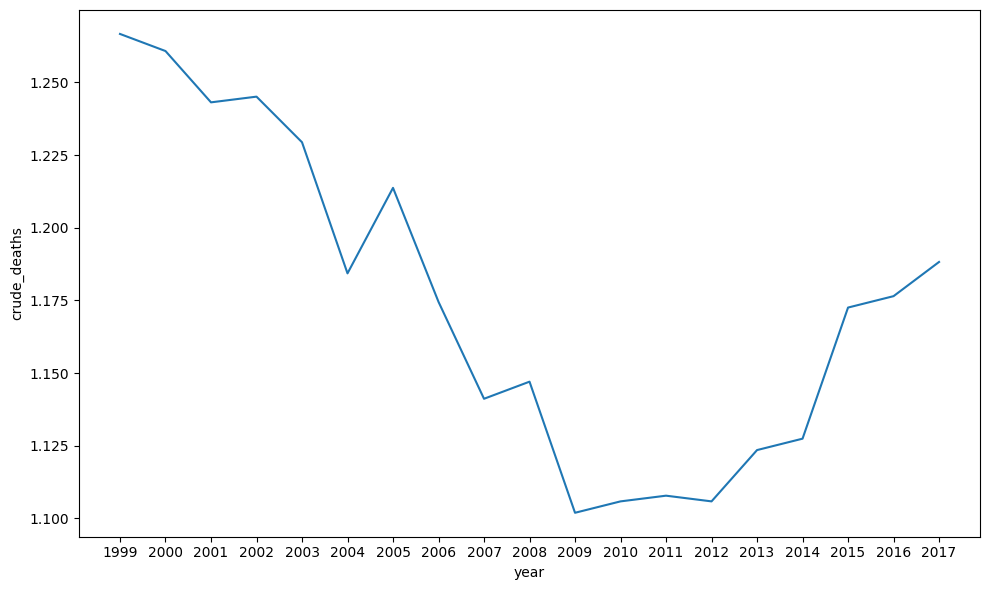

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.xaxis.set_ticks(np.arange(1999, 2018, 1))
p = sns.lineplot(data=not_all, x='year', y='crude_deaths', ci=None)

In [14]:
all = causes_df[(causes_df.cause_name == 'All causes') & (causes_df.state != 'United States')]
all.groupby(['state', 'cause_name']).agg({'crude_deaths':'max'}). \
            sort_values('crude_deaths', ascending=False).head(10)

,,crude_deaths
state,cause_name,
California,All causes,83.0
Florida,All causes,63.0
Texas,All causes,61.0
New York,All causes,57.0
Pennsylvania,All causes,47.0
Ohio,All causes,39.0
Illinois,All causes,39.0
Michigan,All causes,31.0
North Carolina,All causes,29.0


<Axes: xlabel='year', ylabel='crude_deaths'>

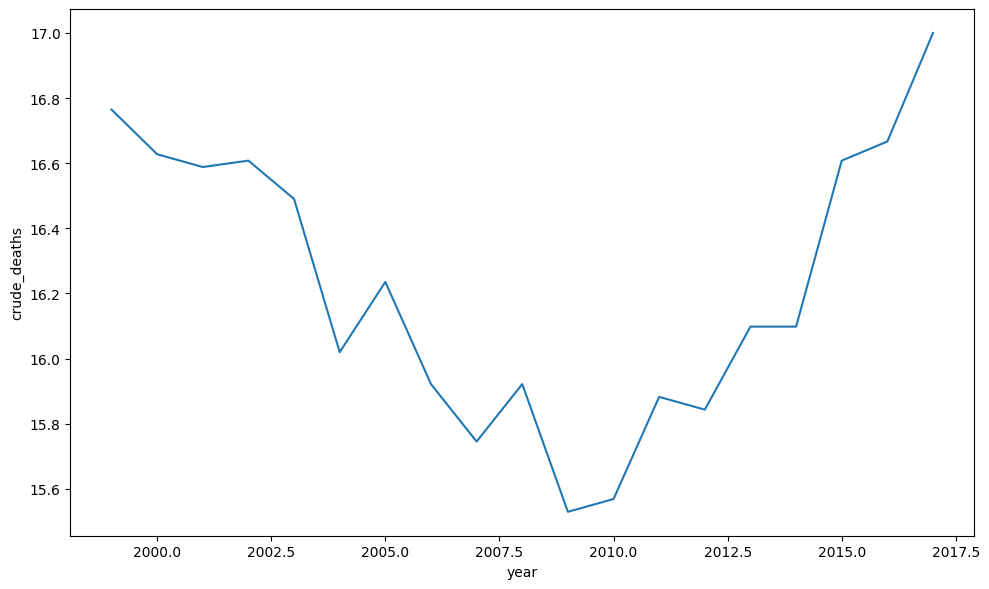

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=all, x='year', y='crude_deaths', ci=None)

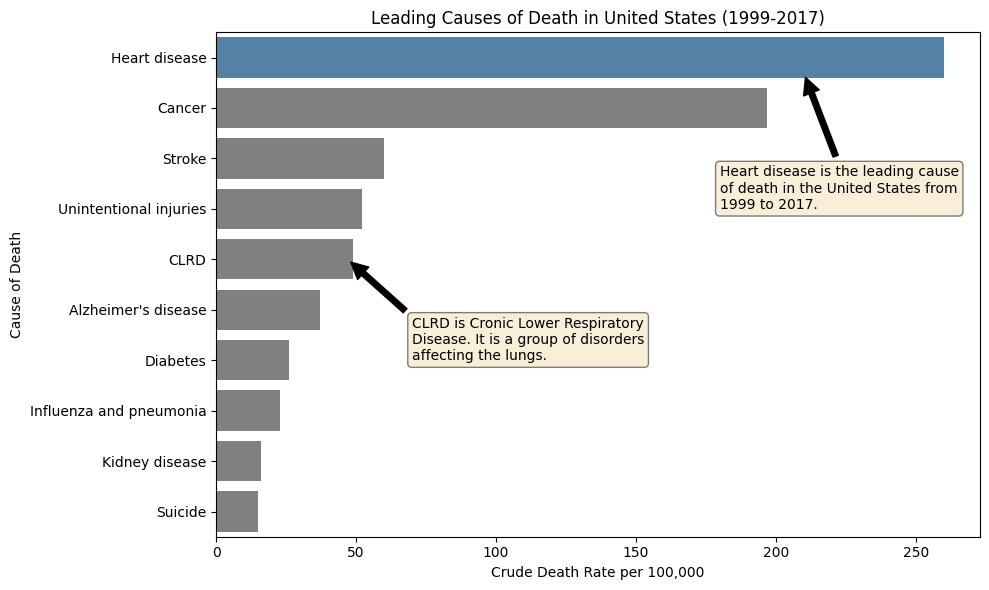

In [33]:
usa_all = causes_df[(causes_df.cause_name != 'All causes') & \
                    (causes_df.state == 'United States')]
p_usa = usa_all.groupby('cause_name').agg({'crude_deaths':'max'}). \
                sort_values('crude_deaths', ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
cols = ['grey' if (x < max(p_usa.crude_deaths)) else 'steelblue' for x in p_usa.crude_deaths]
sns.barplot(data=p_usa, y='cause_name', x='crude_deaths', ci=None, palette=cols)
ax.set(xlabel='Crude Death Rate per 100,000', ylabel='Cause of Death',
       title='Leading Causes of Death in United States (1999-2017)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text1 = '\n'.join(('Heart disease is the leading cause',
                   'of death in the United States from',
                   '1999 to 2017.'))
text2 = '\n'.join(('CLRD is Cronic Lower Respiratory',
                   'Disease. It is a group of disorders',
                   'affecting the lungs.'))
ax.annotate(text1, xy=(210,0.3), xytext=(180,3), bbox=props,
            fontsize=10, arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(text2, xy=(47,4), xytext=(70,6), bbox=props,
            fontsize=10, arrowprops=(dict(facecolor='black', shrink=0.05)))
fig.savefig('../images/allLeadingCauses.png', bbox_inches='tight', dpi=300)

<Axes: xlabel='year', ylabel='crude_deaths'>

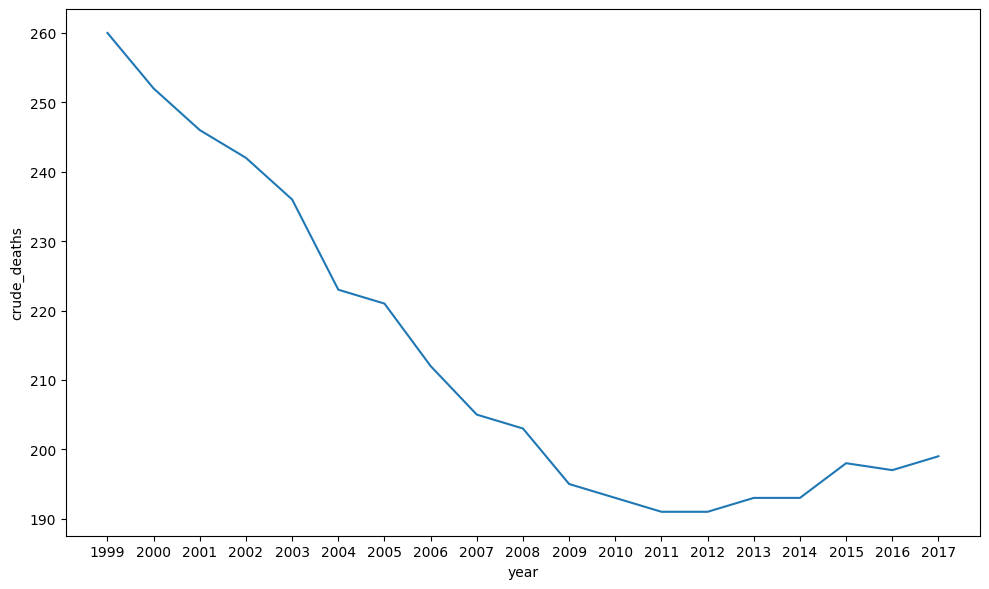

In [17]:
heart = causes_df[(causes_df.cause_name == 'Heart disease') & \
                  (causes_df.state == 'United States')]
p_heart = heart.groupby('year').agg({'crude_deaths':'max'}). \
          sort_values('year')
fig, ax = plt.subplots(figsize=(10,6))
ax.xaxis.set_ticks(np.arange(1999, 2018, 1))
sns.lineplot(data=p_heart, x='year', y='crude_deaths')

<Axes: xlabel='crude_deaths', ylabel='cause_name'>

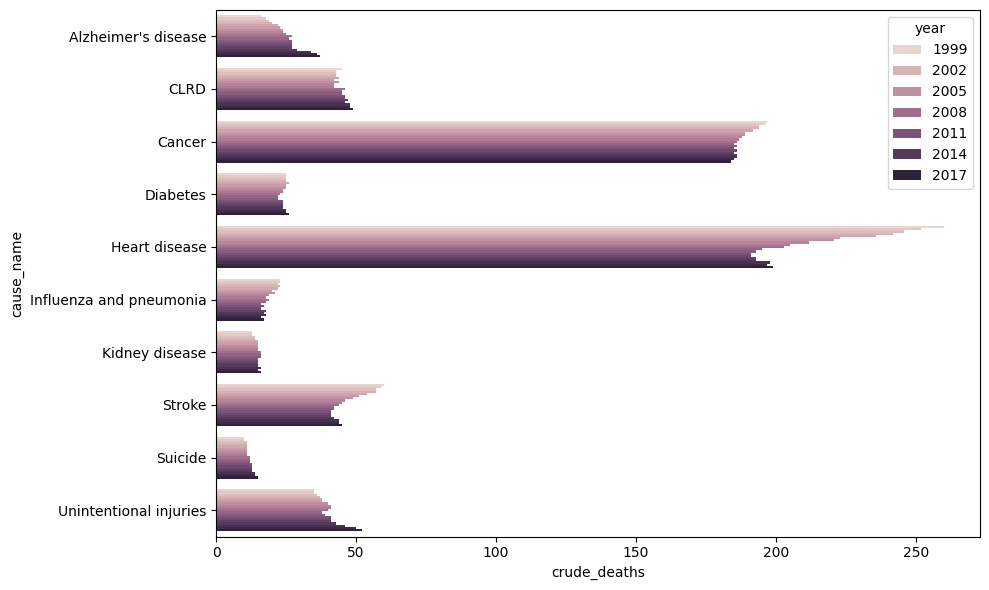

In [41]:
p_cause = usa_all.groupby(['year', 'cause_name']).agg({'crude_deaths':'max'}). \
                         sort_values('year')
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=p_cause, x='crude_deaths', y='cause_name', hue='year')